#📌 Extracão

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
url = 'https://raw.githubusercontent.com/ninesousa/TelecomXbr/refs/heads/main/dados_telecom.csv'
dados = pd.read_csv(url)

dados.head()

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,gasto_mensal,gasto_total,gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Cheque Correio,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Cheque Correio,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Cheque Eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Cheque Eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Cheque Correio,83.9,267.40,2.796667


In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   churn                 7043 non-null   object 
 2   genero                7043 non-null   object 
 3   idoso                 7043 non-null   int64  
 4   parceiro              7043 non-null   object 
 5   dependentes           7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   servico_telefone      7043 non-null   object 
 8   multiplas_linhas      7043 non-null   object 
 9   servico_internet      7043 non-null   object 
 10  antivirus             7043 non-null   object 
 11  backup                7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  streaming_tv          7043 non-null   object 
 15  streaming_filmes     

In [45]:
dados = dados.drop(['id_cliente'], axis=1)


In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7043 non-null   object 
 1   genero                7043 non-null   object 
 2   idoso                 7043 non-null   int64  
 3   parceiro              7043 non-null   object 
 4   dependentes           7043 non-null   object 
 5   meses_contrato        7043 non-null   int64  
 6   servico_telefone      7043 non-null   object 
 7   multiplas_linhas      7043 non-null   object 
 8   servico_internet      7043 non-null   object 
 9   antivirus             7043 non-null   object 
 10  backup                7043 non-null   object 
 11  protecao_dispositivo  7043 non-null   object 
 12  suporte_tecnico       7043 non-null   object 
 13  streaming_tv          7043 non-null   object 
 14  streaming_filmes      7043 non-null   object 
 15  tipo_contrato        

In [47]:
dados_encoded = dados.copy()
colunas_categoricas = dados_encoded.select_dtypes(include=['object']).columns.tolist()

dados_dummies = pd.get_dummies(dados_encoded, columns=colunas_categoricas, drop_first=True)

for col in colunas_categoricas:
    print(f"\nValores únicos em '{col}':")
    print(dados_encoded[col].unique())



Valores únicos em 'churn':
['No' 'Yes']

Valores únicos em 'genero':
['Female' 'Male']

Valores únicos em 'parceiro':
['Yes' 'No']

Valores únicos em 'dependentes':
['Yes' 'No']

Valores únicos em 'servico_telefone':
['Yes' 'No']

Valores únicos em 'multiplas_linhas':
['No' 'Yes' 'No phone service']

Valores únicos em 'servico_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos em 'antivirus':
['No' 'Yes' 'No internet service']

Valores únicos em 'backup':
['Yes' 'No' 'No internet service']

Valores únicos em 'protecao_dispositivo':
['No' 'Yes' 'No internet service']

Valores únicos em 'suporte_tecnico':
['Yes' 'No' 'No internet service']

Valores únicos em 'streaming_tv':
['Yes' 'No' 'No internet service']

Valores únicos em 'streaming_filmes':
['No' 'Yes' 'No internet service']

Valores únicos em 'tipo_contrato':
['One year' 'Month-to-month' 'Two year']

Valores únicos em 'fatura_digital':
['Yes' 'No']

Valores únicos em 'metodo_pagamento':
['Cheque Correio' 'Cheque Eletrônico' 'C

In [48]:
contagem_churn = dados_encoded["churn"].value_counts()
total_clientes = contagem_churn.sum()

proporcao_ativos = contagem_churn['No'] / total_clientes
proporcao_evadidos = contagem_churn['Yes'] / total_clientes

print("Total de clientes por categoria 'churn':")
print(contagem_churn)
print(f"\n Clientes ATIVOS: {proporcao_ativos:.2%}")
print(f" Clientes EVASIVO: {proporcao_evadidos:.2%}")

if proporcao_evadidos < 0.29:
    print("\n Desequilíbrio detectado: recomenda-se aplicar técnicas de balanceamento para modelos preditivos.")
else:
    print("\n As classes estão relativamente balanceadas.")


Total de clientes por categoria 'churn':
churn
No     5174
Yes    1869
Name: count, dtype: int64

 Clientes ATIVOS: 73.46%
 Clientes EVASIVO: 26.54%

 Desequilíbrio detectado: recomenda-se aplicar técnicas de balanceamento para modelos preditivos.


In [49]:
dados_plot = dados_encoded.dropna(subset=['meses_contrato', 'churn'])


In [50]:
cols_binarias = [
    'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas',
    'servico_internet', 'antivirus', 'backup', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'fatura_digital'
]

for col in cols_binarias:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

dados['churn_num'] = dados['churn'].map({'Yes': 1, 'No': 0})

cols_analise = [
    'churn_num', 'gasto_mensal', 'gasto_total', 'gasto_diario',
    'meses_contrato', 'idoso'
] + cols_binarias

corr = dados[cols_analise].corr()

print(corr['churn_num'].sort_values(ascending=False))


churn_num               1.000000
gasto_mensal            0.193356
gasto_diario            0.193356
fatura_digital          0.191825
idoso                   0.150889
multiplas_linhas        0.040207
servico_telefone        0.011942
streaming_tv           -0.037057
streaming_filmes       -0.040132
parceiro               -0.150448
dependentes            -0.164221
protecao_dispositivo   -0.177125
backup                 -0.196061
gasto_total            -0.199484
suporte_tecnico        -0.274422
antivirus              -0.280816
meses_contrato         -0.352229
servico_internet             NaN
Name: churn_num, dtype: float64


In [51]:
tabela = pd.crosstab(dados['genero'], dados['churn'], normalize='index') * 100
print(tabela.round(2))


churn      No    Yes
genero              
Female  73.08  26.92
Male    73.84  26.16


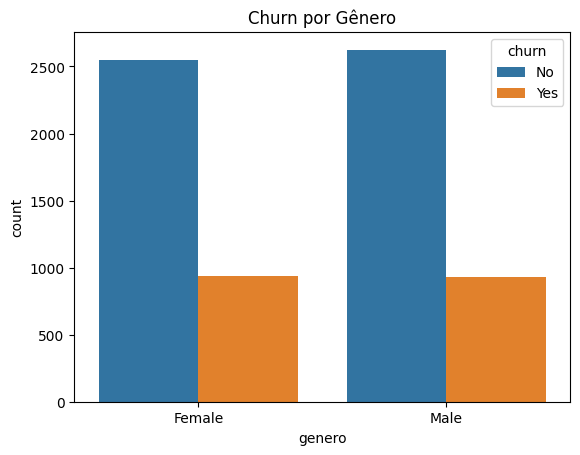

In [52]:
sns.countplot(data=dados, x='genero', hue='churn')
plt.title('Churn por Gênero')
plt.show()

In [53]:
dados.groupby('genero')['gasto_total'].describe()


,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
Female,3483.0,2283.190985,2270.830254,18.85,402.875,1387.35,3819.8,8672.45
Male,3549.0,2283.407861,2263.100874,18.80,397.000,1404.65,3771.5,8684.80


In [54]:
from scipy.stats import ttest_ind

grupo1 = dados[dados['genero'] == 'Male']['gasto_total'].dropna()
grupo2 = dados[dados['genero'] == 'Female']['gasto_total'].dropna()

t_stat, p_val = ttest_ind(grupo1, grupo2)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")




T-statistic: 0.004, p-value: 0.997


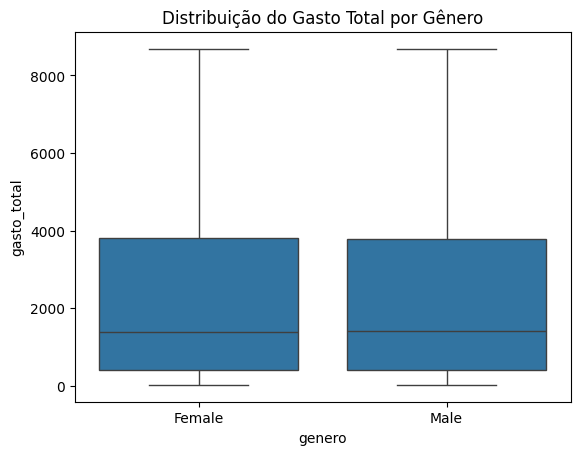

In [55]:

sns.boxplot(data=dados, x='genero', y='gasto_total')
plt.title('Distribuição do Gasto Total por Gênero')
plt.show()

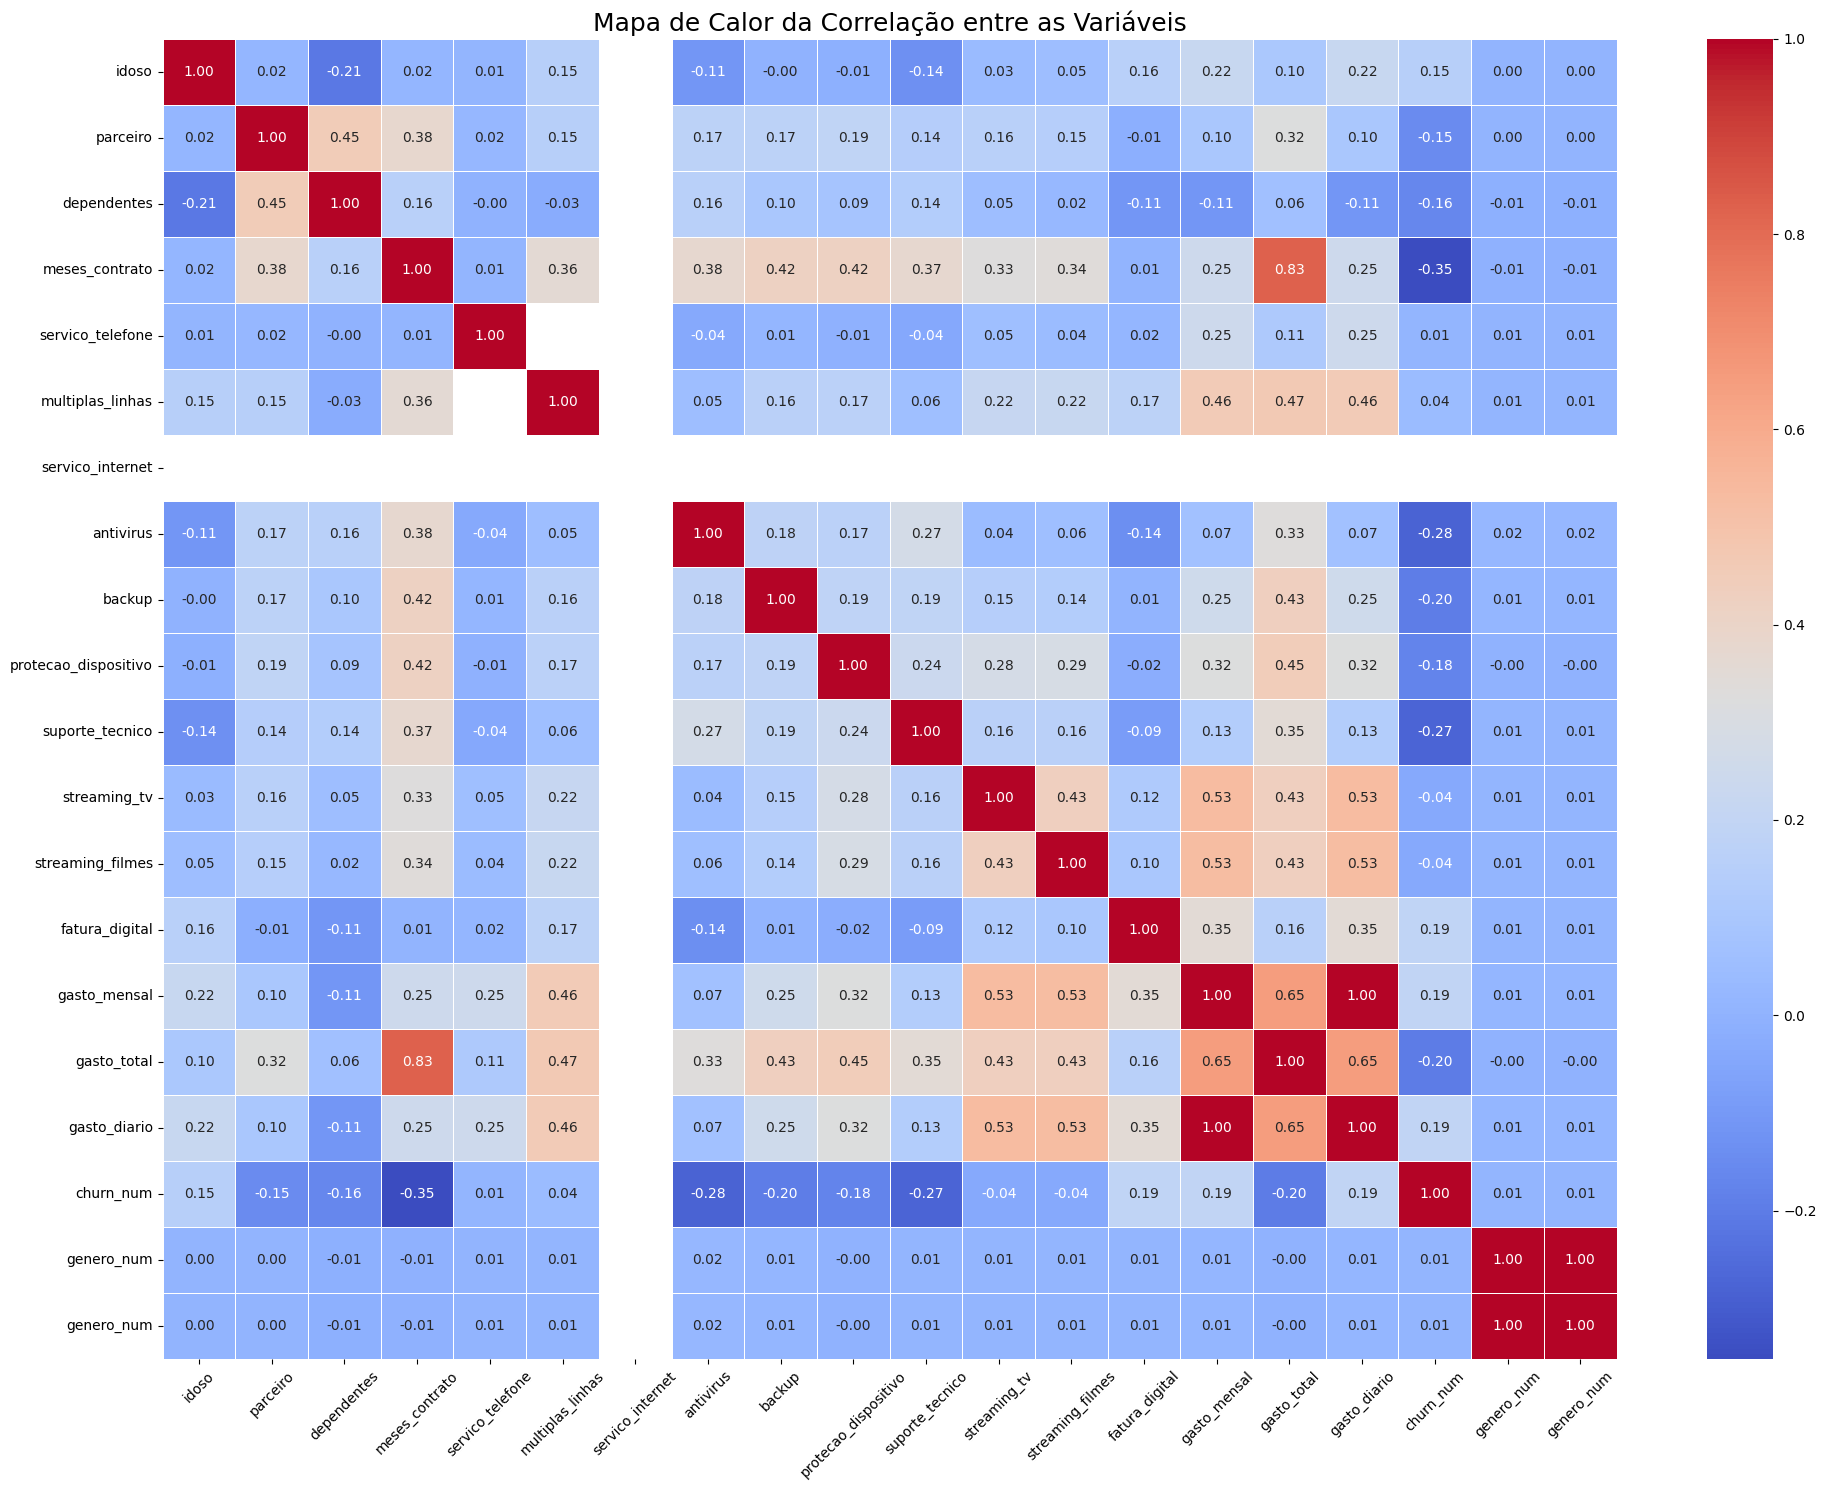

In [57]:
dados_encoded['genero_num'] = dados_encoded['genero'].map({'Male': 0, 'Female': 1})
colunas_numericas = dados.select_dtypes(include=['float64', 'int64']).columns.tolist()
colunas_numericas.append('genero_num')
dados_corr = dados[colunas_numericas].corr()

plt.figure(figsize=(20, 15))

sns.heatmap(
    dados_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Mapa de Calor da Correlação entre as Variáveis', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Relatório de Análise de Churn - Telecom

## 1. Introdução

Este relatório apresenta a análise dos dados de clientes de uma empresa de telecomunicações, com o objetivo de entender os fatores que influenciam a evasão (churn) dos clientes. A evasão impacta diretamente a receita e a sustentabilidade do negócio, por isso é fundamental identificar padrões que possam ajudar a reduzir essa taxa.

## 2. Limpeza e Tratamento de Dados

- Importação dos dados no formato JSON.
- Renomeação das colunas para português e padronização.
- Tratamento de valores ausentes (`NaN`) e valores vazios.
- Conversão das colunas numéricas para tipos adequados (ex: gasto mensal, gasto total).
- Criação da coluna `gasto_diario` a partir do gasto mensal dividido por 30.

## 3. Análise Exploratória de Dados

- Distribuição dos clientes por status de churn (`Ativo` vs `Evadido`).
- Análise do tempo de contrato médio dos clientes, mostrando que clientes com contratos mais longos tendem a permanecer ativos.
- Análise da distribuição do gasto mensal em relação ao churn.
- Visualizações:
  - Gráfico de barras para distribuição de churn.
  - Boxplots para comparar meses de contrato e gasto mensal entre grupos.
  - Mapas de calor para correlações entre variáveis numéricas.

## 4. Conclusões e Insights

- Clientes com menor tempo de contrato possuem maior propensão a evadir.
- O gasto mensal tende a ser menor nos clientes que evadiram.
- Variáveis categóricas como tipo de contrato e forma de pagamento mostram impacto relevante na retenção.
- Desequilíbrio na base de dados, com menor percentual de clientes evadidos (~25%).

## 5. Recomendações

- Focar em estratégias para clientes com contratos mais curtos, oferecendo incentivos para renovação.
- Avaliar planos e formas de pagamento que promovam maior retenção.
- Implementar campanhas direcionadas para clientes em risco de evasão baseado nos padrões identificados.
- Aplicar técnicas de balanceamento nos modelos preditivos devido ao desequilíbrio entre classes.

---

*Relatório gerado com Python utilizando bibliotecas pandas, seaborn, matplotlib e scipy.*
